In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Check for files in the root directory
for dirname, _, filenames in os.walk('.'):  # Current working directory
    for filename in filenames:
        print(os.path.join(dirname, filename))

./.config/config_sentinel
./.config/active_config
./.config/.last_survey_prompt.yaml
./.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
./.config/default_configs.db
./.config/.last_opt_in_prompt.yaml
./.config/gce
./.config/.last_update_check.json
./.config/configurations/config_default
./.config/logs/2024.12.05/14.23.06.901164.log
./.config/logs/2024.12.05/14.23.28.455145.log
./.config/logs/2024.12.05/14.23.52.381553.log
./.config/logs/2024.12.05/14.23.51.697768.log
./.config/logs/2024.12.05/14.23.40.795742.log
./.config/logs/2024.12.05/14.23.39.346831.log
./sample_data/anscombe.json
./sample_data/README.md
./sample_data/california_housing_train.csv
./sample_data/california_housing_test.csv
./sample_data/mnist_test.csv
./sample_data/mnist_train_small.csv


In [ ]:
# Step 1: Load the required libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer  # Corrected
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    f1_score,
    classification_report
)
import tensorflow as tf
from tensorflow import data
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import mae
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# Set default configurations
np.set_printoptions(suppress=True)  # Suppress scientific notation in NumPy
plt.style.use("ggplot")  # Set Matplotlib style
plt.rcParams["figure.figsize"] = (6, 4)  # Default figure size
sns.set()  # Default Seaborn style

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
normal_df = pd.read_csv("/content/ptbdb_normal.csv").iloc[:, :-1]
anomaly_df = pd.read_csv("/content/ptbdb_abnormal.csv").iloc[:, :-1]
normal_df.head()

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.55,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


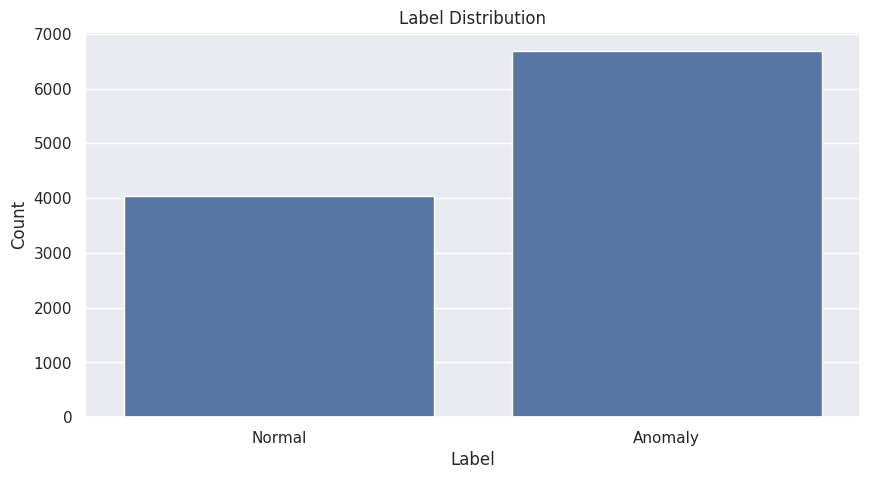

In [ ]:
# Step 3: Visualize label distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.DataFrame({'label': [0] * len(normal_df) + [1] * len(anomaly_df)}), x='label')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Normal', 'Anomaly'])
plt.show()


In [ ]:
# Step 4: Display basic statistics
print("Normal DataFrame Statistics:")
print(normal_df.describe())

print("\nAnomaly DataFrame Statistics:")
print(anomaly_df.describe())



Normal DataFrame Statistics:
       1.000000000000000000e+00  9.003241658210754395e-01  \
count               4045.000000               4045.000000   
mean                   0.979665                  0.711439   
std                    0.029063                  0.186376   
min                    0.782178                  0.121784   
25%                    0.964454                  0.580160   
50%                    1.000000                  0.726231   
75%                    1.000000                  0.863610   
max                    1.000000                  1.000000   

       3.585899472236633301e-01  5.145867168903350830e-02  \
count               4045.000000               4045.000000   
mean                   0.311665                  0.119592   
std                    0.183478                  0.110466   
min                    0.000000                  0.000000   
25%                    0.164109                  0.028717   
50%                    0.303182                  0.0926

In [ ]:
# Step 5: Interactive correlation matrices using Plotly with a better color scale
import plotly.express as px

# Create an interactive heatmap for the normal dataset
fig_normal = px.imshow(
    normal_df.corr(),
    text_auto=True,
    color_continuous_scale='Viridis',  # Change color scale for better visualization
    title='Interactive Correlation Matrix for Normal DataFrame',
    labels={'color': 'Correlation'},
    aspect='auto'
)
fig_normal.update_xaxes(side='bottom')
fig_normal.show()

# Create an interactive heatmap for the anomaly dataset
fig_anomaly = px.imshow(
    anomaly_df.corr(),
    text_auto=True,
    color_continuous_scale='Viridis',  # Change color scale for better visualization
    title='Interactive Correlation Matrix for Anomaly DataFrame',
    labels={'color': 'Correlation'},
    aspect='auto'
)
fig_anomaly.update_xaxes(side='bottom')
fig_anomaly.show()




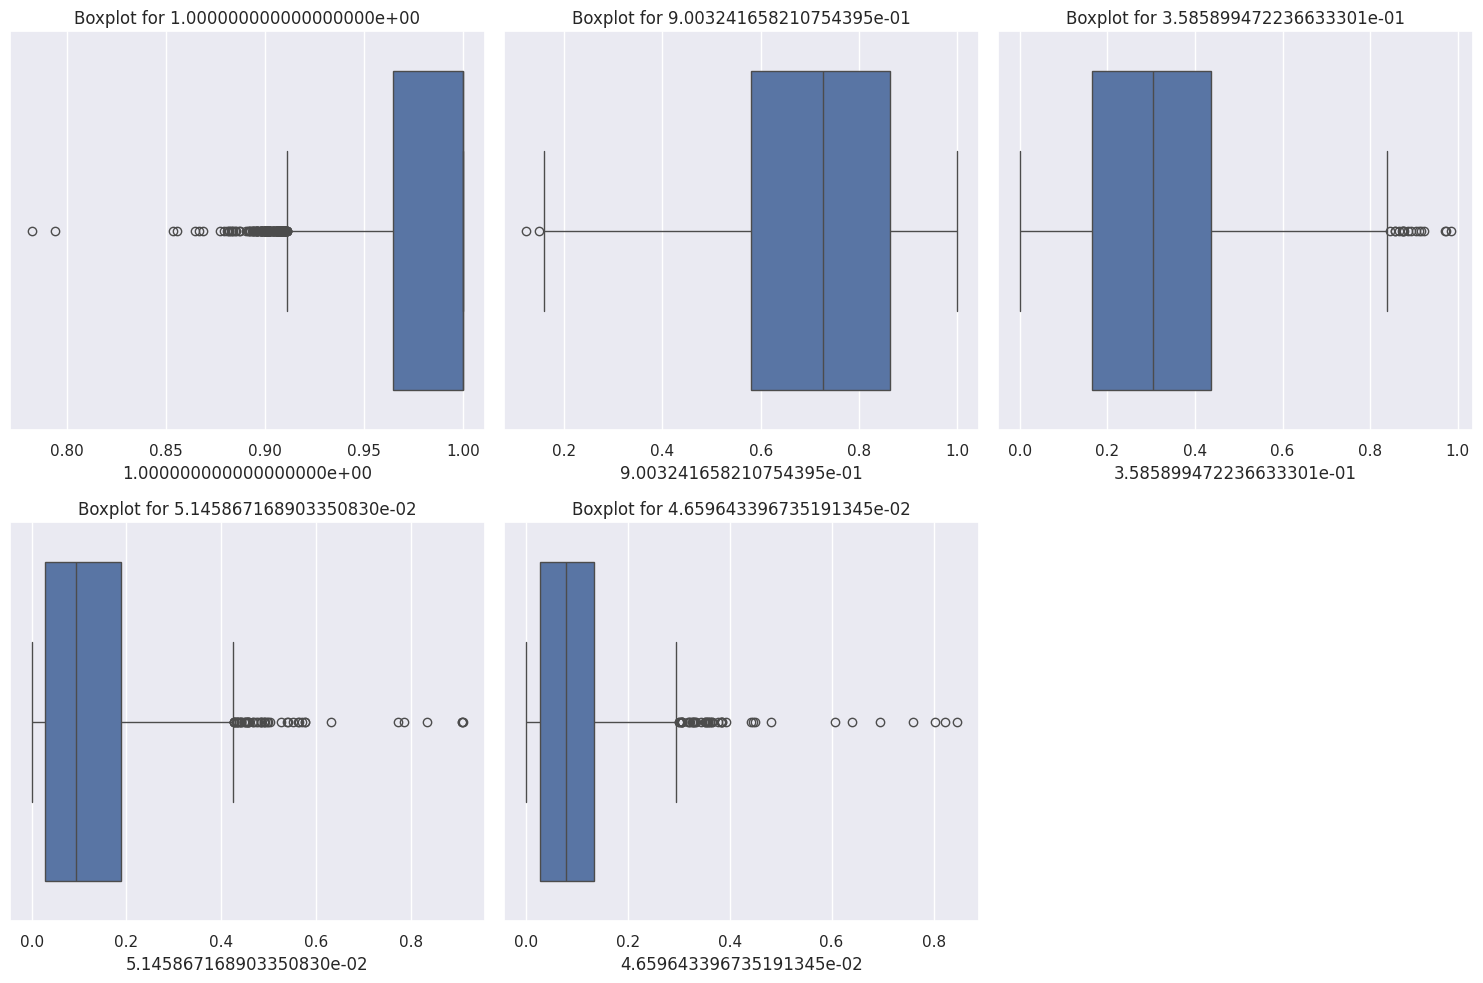

In [ ]:
# Step 6: Boxplot for a sample of features to check outliers
sample_features = normal_df.columns[:5]  # Select the first 5 features as a sample

plt.figure(figsize=(15, 10))
for i, feature in enumerate(sample_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=normal_df, x=feature)
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()



In [ ]:
# Step 7: Handle missing values (NaN)
# Check for missing values in both DataFrames
print("Missing values in Normal DataFrame:")
print(normal_df.isnull().sum())

print("\nMissing values in Anomaly DataFrame:")
print(anomaly_df.isnull().sum())

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
normal_df_imputed = pd.DataFrame(imputer.fit_transform(normal_df), columns=normal_df.columns)
anomaly_df_imputed = pd.DataFrame(imputer.fit_transform(anomaly_df), columns=anomaly_df.columns)

# Confirm there are no missing values left
print("\nMissing values after imputation in Normal DataFrame:")
print(normal_df_imputed.isnull().sum())

print("\nMissing values after imputation in Anomaly DataFrame:")
print(anomaly_df_imputed.isnull().sum())


Missing values in Normal DataFrame:
1.000000000000000000e+00       0
9.003241658210754395e-01       0
3.585899472236633301e-01       0
5.145867168903350830e-02       0
4.659643396735191345e-02       0
                              ..
0.000000000000000000e+00.60    0
0.000000000000000000e+00.61    0
0.000000000000000000e+00.62    0
0.000000000000000000e+00.63    0
0.000000000000000000e+00.64    0
Length: 187, dtype: int64

Missing values in Anomaly DataFrame:
9.322328567504882812e-01        0
8.696785569190979004e-01        0
8.861859440803527832e-01        0
9.296264052391052246e-01        0
9.087749719619750977e-01        0
                               ..
0.000000000000000000e+00.121    1
0.000000000000000000e+00.122    1
0.000000000000000000e+00.123    1
0.000000000000000000e+00.124    1
0.000000000000000000e+00.125    1
Length: 187, dtype: int64

Missing values after imputation in Normal DataFrame:
1.000000000000000000e+00       0
9.003241658210754395e-01       0
3.585899472236633

# PCA

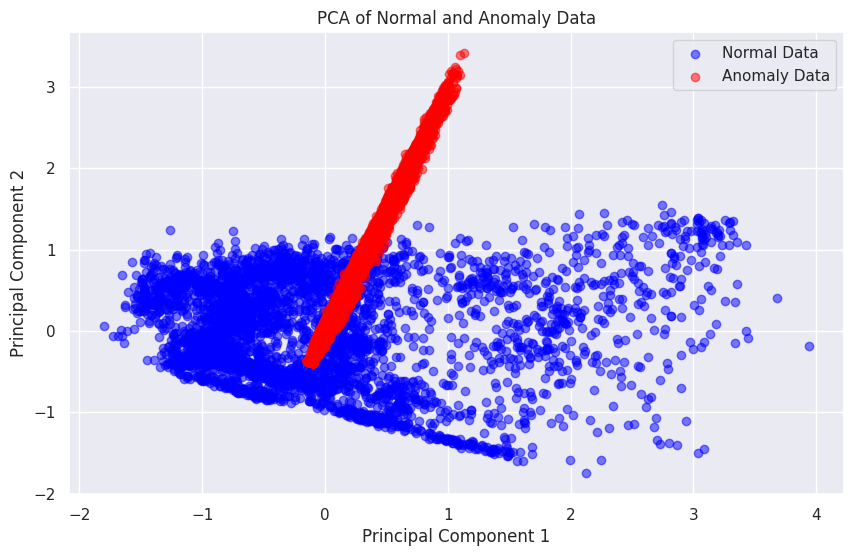

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Align column names to ensure consistency
anomaly_df_imputed = pd.DataFrame(anomaly_df_imputed, columns=normal_df_imputed.columns)

# Step 1: Impute missing values in both normal and anomaly datasets
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of each column

# Apply the imputer
normal_imputed = imputer.fit_transform(normal_df_imputed)  # Fit and transform on normal data
anomaly_imputed = imputer.transform(anomaly_df_imputed)    # Transform anomaly data

# Step 2: Apply PCA to the imputed data
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
normal_pca = pca.fit_transform(normal_imputed)
anomaly_pca = pca.transform(anomaly_imputed)

# Step 3: Visualize the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(normal_pca[:, 0], normal_pca[:, 1], color='blue', label='Normal Data', alpha=0.5)
plt.scatter(anomaly_pca[:, 0], anomaly_pca[:, 1], color='red', label='Anomaly Data', alpha=0.5)
plt.title('PCA of Normal and Anomaly Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
print("Shape of Normal data", normal_df.shape)
print("Shape of Abnormal data", anomaly_df.shape)

Shape of Normal data (4045, 187)
Shape of Abnormal data (6693, 187)


In [ ]:
def plot_sample(normal, anomaly):
    index = np.random.randint(0, len(normal_df), 2)

    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
    ax[0].plot(normal.iloc[index[0], :].values, label=f"Case {index[0]}")
    ax[0].plot(normal.iloc[index[1], :].values, label=f"Case {index[1]}")
    ax[0].legend(shadow=True, frameon=True, facecolor="inherit", loc=1, fontsize=9)
    ax[0].set_title("Normal")

    ax[1].plot(anomaly.iloc[index[0], :].values, label=f"Case {index[0]}")
    ax[1].plot(anomaly.iloc[index[1], :].values, label=f"Case {index[1]}")
    ax[1].legend(shadow=True, frameon=True, facecolor="inherit", loc=1, fontsize=9)
    ax[1].set_title("Anomaly")

    plt.tight_layout()
    plt.show()

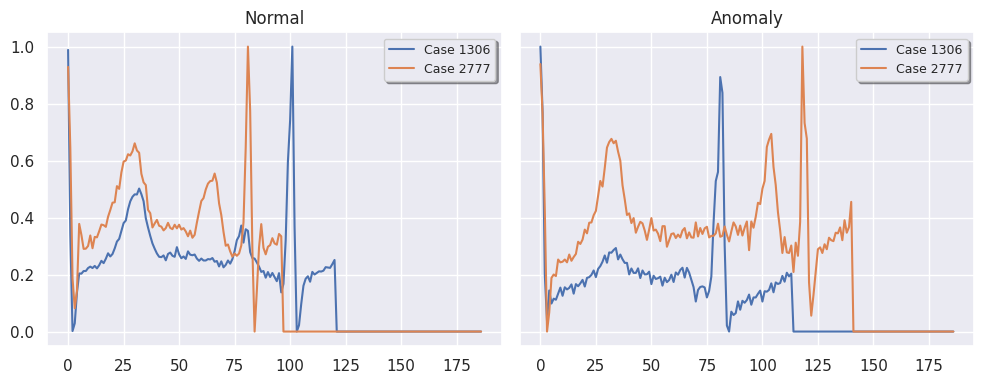

In [ ]:
plot_sample(normal_df, anomaly_df)

In [ ]:
CLASS_NAMES = ["Normal", "Anomaly"]

normal_df_copy = normal_df.copy()
anomaly_df_copy = anomaly_df.copy()
print(anomaly_df_copy.columns.equals(normal_df_copy.columns))


False


In [ ]:
# Check the number of columns in both DataFrames
print("Normal DF columns:", len(normal_df.columns))
print("Anomaly DF columns:", len(anomaly_df.columns))

# Adjust the range based on the actual number of columns
num_columns_normal = normal_df.shape[1]
num_columns_anomaly = anomaly_df.shape[1]

# Set the axis to the actual number of columns
normal_df = normal_df.set_axis(range(1, num_columns_normal + 1), axis=1)
anomaly_df = anomaly_df.set_axis(range(1, num_columns_anomaly + 1), axis=1)

# Add the 'target' column
normal_df = normal_df.assign(target='Normal')
anomaly_df = anomaly_df.assign(target='Anomaly')

# Combine the DataFrames
combined_data = pd.concat([normal_df, anomaly_df], axis=0)

# Verify the structure of the combined DataFrame
print(combined_data.head())
print(combined_data.columns)




Normal DF columns: 187
Anomaly DF columns: 187
          1         2         3         4         5         6         7  \
0  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
1  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
2  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
3  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   
4  0.948983  0.505265  0.004176  0.022513  0.059550  0.107298  0.110385   

          8         9        10  ...  179  180  181  182  183  184  185  186  \
0  0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.111293  0.116558  0.118192  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   187  target  
0  0

# Splitting the data to training and testing set

In [ ]:
normal_df.drop("target", axis=1, errors="ignore", inplace=True)
normal = normal_df.to_numpy()
anomaly_df.drop("target", axis=1, errors="ignore", inplace=True)
anomaly = anomaly_df.to_numpy()

X_train, X_test = train_test_split(normal, test_size=0.15, random_state=45, shuffle=True)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}, anomaly shape: {anomaly.shape}")


Train shape: (3438, 187), Test shape: (607, 187), anomaly shape: (6693, 187)


# Building CNN Autoencoder Model

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
tf.keras.utils.set_random_seed(1024)

In [ ]:
class AutoEncoder(Model):
    def __init__(self, input_dim, latent_dim):
        super(AutoEncoder, self).__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim

        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(input_dim,)),
            layers.Reshape((input_dim, 1)),  # Reshape to 3D for Conv1D
            layers.Conv1D(128, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
            layers.Conv1D(128, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
            layers.Conv1D(latent_dim, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
        ])
        # Previously, I was using UpSampling. I am trying Transposed Convolution this time around.
        self.decoder = tf.keras.Sequential([
            layers.Conv1DTranspose(latent_dim, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(128, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(128, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Flatten(),
            layers.Dense(input_dim)
        ])

    def call(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded


input_dim = X_train.shape[-1]
latent_dim = 32

model = AutoEncoder(input_dim, latent_dim)
model.build((None, input_dim))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mae")
model.summary()

Model: "auto_encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 24, 32)              │          63,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,264 (247.12 KB)

 Trainable params: 62,688 (244.88 KB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
epochs = 100
batch_size = 128
early_stopping = EarlyStopping(patience=10, min_delta=1e-3, monitor="val_loss", restore_best_weights=True)


history = model.fit(X_train, X_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1, callbacks=[early_stopping])


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 252ms/step - loss: 0.1777 - val_loss: 0.1044
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 327ms/step - loss: 0.0939 - val_loss: 0.0880
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - loss: 0.0865 - val_loss: 0.0857
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 337ms/step - loss: 0.0852 - val_loss: 0.0859
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - loss: 0.0856 - val_loss: 0.0849
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - loss: 0.0842 - val_loss: 0.0846
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 224ms/step - loss: 0.0840 - val_loss: 0.0849
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 323ms/step - loss: 0.0844 - val_loss: 0.0840
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 219ms/step - loss: 0.0842 - val_loss: 0.0846
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 276ms/step - loss: 0.0839 - val_loss: 0.0838
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 0.0836 - val_loss: 0.0843
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━

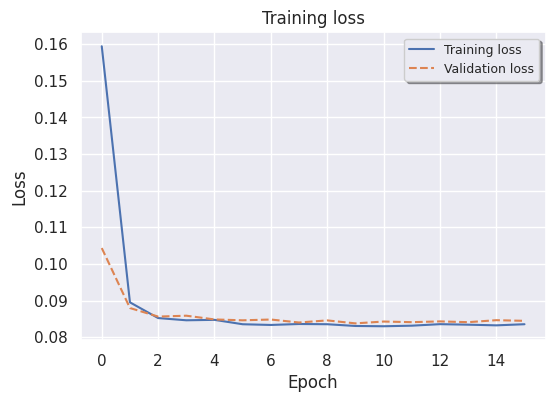

In [ ]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss", ls="--")
plt.legend(shadow=True, frameon=True, facecolor="inherit", loc="best", fontsize=9)
plt.title("Training loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()


In [ ]:
train_mae = model.evaluate(X_train, X_train, verbose=0)
test_mae = model.evaluate(X_test, X_test, verbose=0)
anomaly_mae = model.evaluate(anomaly_df, anomaly_df, verbose=0)

print("Training dataset error: ", train_mae)
print("Testing dataset error: ", test_mae)
print("Anomaly dataset error: ", anomaly_mae)

Training dataset error:  0.08357346802949905
Testing dataset error:  0.08499293774366379
Anomaly dataset error:  nan


In [ ]:
def predict(model, X):
    pred = model.predict(X, verbose=False)
    loss = mae(pred, X)
    return pred, loss

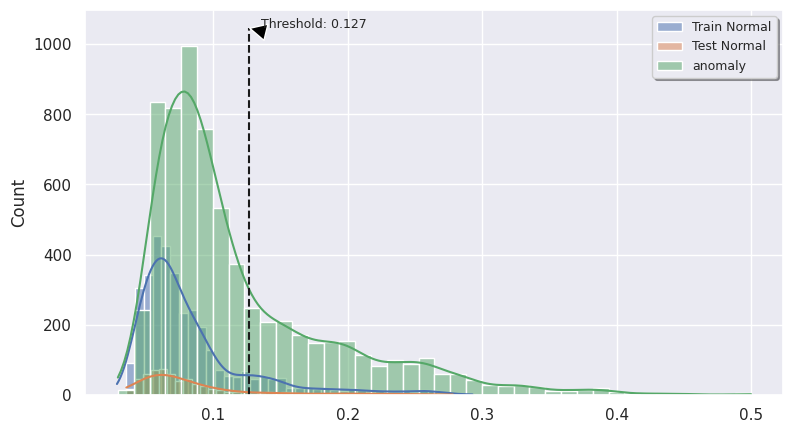

In [ ]:
_, train_loss = predict(model, X_train)
_, test_loss = predict(model, X_test)
_, anomaly_loss = predict(model, anomaly)
threshold = np.mean(train_loss) + np.std(train_loss) # Setting threshold for distinguish normal data from anomalous data

bins = 40
plt.figure(figsize=(9, 5), dpi=100)
sns.histplot(np.clip(train_loss, 0, 0.5), bins=bins, kde=True, label="Train Normal")
sns.histplot(np.clip(test_loss, 0, 0.5), bins=bins, kde=True, label="Test Normal")
sns.histplot(np.clip(anomaly_loss, 0, 0.5), bins=bins, kde=True, label="anomaly")

ax = plt.gca()  # Get the current Axes
ylim = ax.get_ylim()
plt.vlines(threshold, 0, ylim[-1], color="k", ls="--")
plt.annotate(f"Threshold: {threshold:.3f}", xy=(threshold, ylim[-1]), xytext=(threshold+0.009, ylim[-1]),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=9)
plt.legend(shadow=True, frameon=True, facecolor="inherit", loc="best", fontsize=9)
plt.show()

In [ ]:
def plot_examples(model, data, ax, title):
    pred, loss = predict(model, data)
    ax.plot(data.flatten(), label="Actual")
    ax.plot(pred[0], label = "Predicted")
    ax.fill_between(range(1, 188), data.flatten(), pred[0], alpha=0.3, color="r")
    ax.legend(shadow=True, frameon=True,
              facecolor="inherit", loc=1, fontsize=7)
#                bbox_to_anchor = (0, 0, 0.8, 0.25))

    ax.set_title(f"{title} (loss: {loss[0]:.3f})", fontsize=9.5)

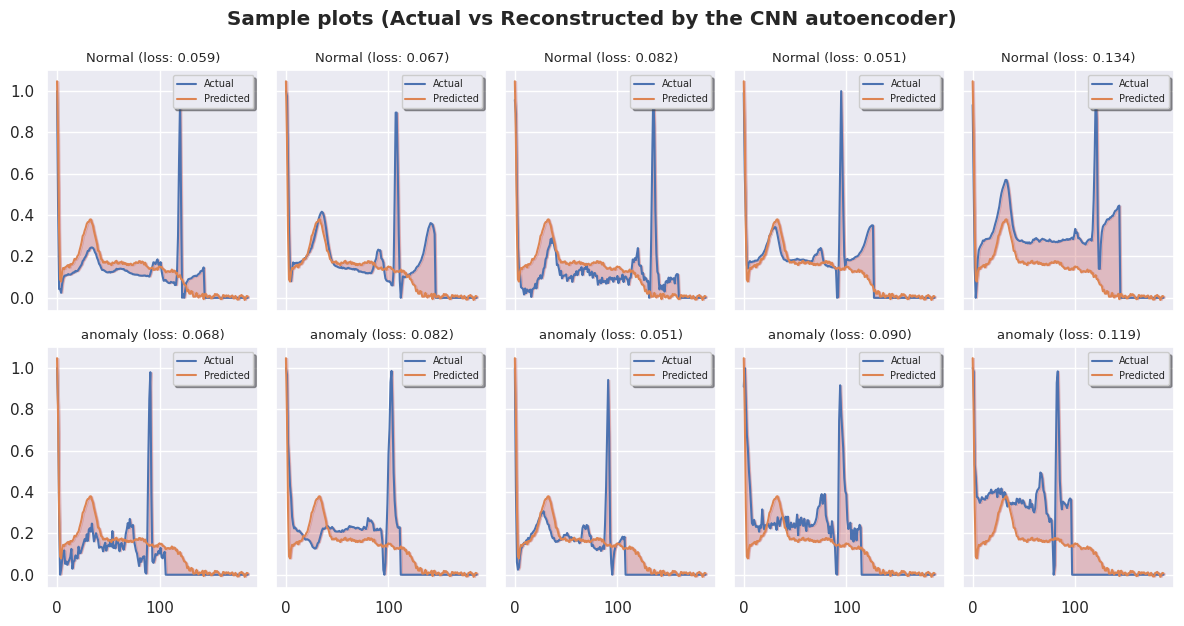

In [ ]:
fig, axes = plt.subplots(2, 5, sharey=True, sharex=True, figsize=(12, 6), facecolor="w")
random_indexes = np.random.randint(0, len(X_train), size=5)

for i, idx in enumerate(random_indexes):
    data = X_train[[idx]]
    plot_examples(model, data, ax=axes[0, i], title="Normal")

for i, idx in enumerate(random_indexes):
    data = anomaly[[idx]]
    plot_examples(model, data, ax=axes[1, i], title="anomaly")

plt.tight_layout()
fig.suptitle("Sample plots (Actual vs Reconstructed by the CNN autoencoder)", y=1.04, weight="bold")
fig.savefig("autoencoder.png", dpi=500)
plt.show()

In [ ]:
fig.savefig("autoencoder.png", dpi=500, transparent=False, facecolor="white")

In [ ]:
def evaluate_model(model, data):
    pred, loss = predict(model, data)
    if id(data) == id(anomaly):
        accuracy = np.sum(loss > threshold)/len(data)
    else:
        accuracy = np.sum(loss <= threshold)/len(data)
    return f"Accuracy: {accuracy:.2%}"

In [ ]:
print("Training", evaluate_model(model, X_train))
print("Testing", evaluate_model(model, X_test))
print("Anomaly", evaluate_model(model, anomaly))

Training Accuracy: 86.97%
Testing Accuracy: 86.66%
Anomaly Accuracy: 30.48%


In [ ]:
def prepare_labels(model, train, test, anomaly, threshold=0.5):
    ytrue = np.concatenate((np.ones(len(X_train)+len(X_test), dtype=int), np.zeros(len(anomaly), dtype=int)))
    _, train_loss = predict(model, train)
    _, test_loss = predict(model, test)
    _, anomaly_loss = predict(model, anomaly)
    train_pred = (train_loss <= threshold).numpy().astype(int)
    test_pred = (test_loss <= threshold).numpy().astype(int)
    anomaly_pred = (anomaly_loss < threshold).numpy().astype(int)
    ypred = np.concatenate((train_pred, test_pred, anomaly_pred))

    return ytrue, ypred

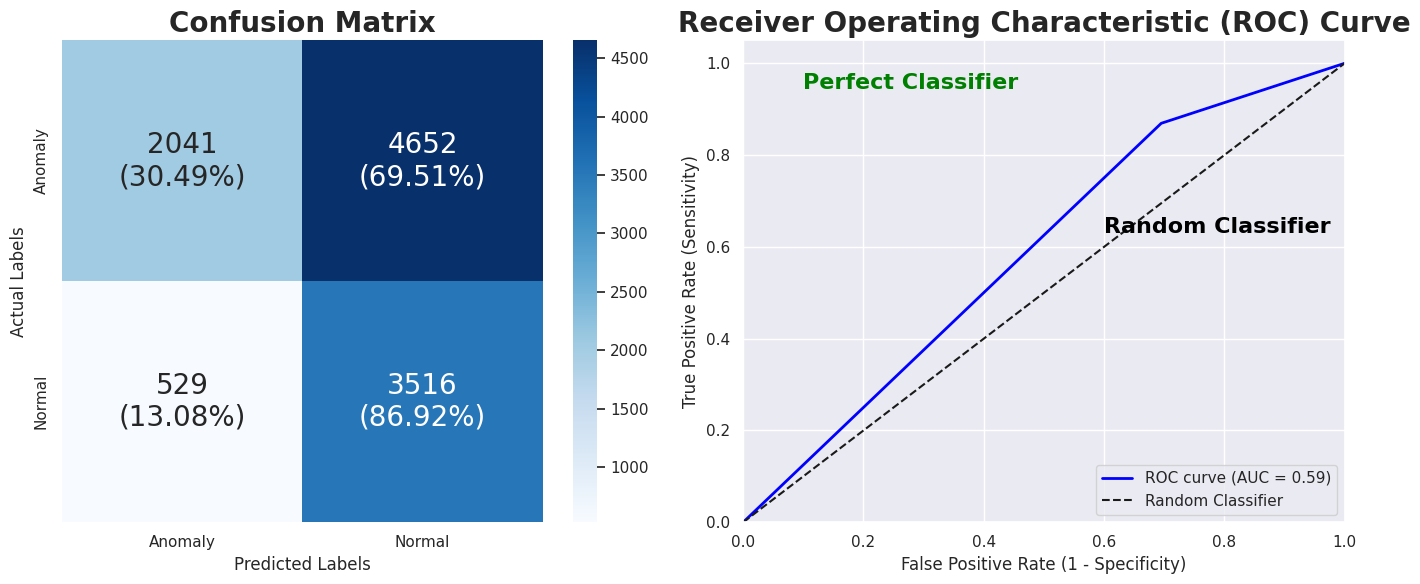

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

def plot_confusion_matrix_and_roc_curve(model, train, test, anomaly, threshold=0.5):
    # Prepare the labels and predictions
    ytrue, ypred = prepare_labels(model, train, test, anomaly, threshold=threshold)

    # Calculate accuracy, precision, recall, and f1 score
    accuracy = accuracy_score(ytrue, ypred)
    precision = precision_score(ytrue, ypred)
    recall = recall_score(ytrue, ypred)
    f1 = f1_score(ytrue, ypred)

    # Confusion matrix
    cm = confusion_matrix(ytrue, ypred)
    cm_norm = confusion_matrix(ytrue, ypred, normalize="true")
    data = np.array([f"{count}\n({pct:.2%})" for count, pct in zip(cm.ravel(), cm_norm.ravel())]).reshape(cm.shape)
    labels = ["Anomaly", "Normal"]

    # Plot confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    sns.heatmap(cm, annot=data, fmt="", xticklabels=labels, yticklabels=labels, cmap='Blues', ax=ax[0], annot_kws={"size": 20})
    ax[0].set_ylabel("Actual Labels")
    ax[0].set_xlabel("Predicted Labels")
    ax[0].set_title("Confusion Matrix", weight="bold", size=20)

    fpr, tpr, thresholds = roc_curve(ytrue, ypred)

    auc = roc_auc_score(ytrue, ypred)

    # Plot ROC curve
    ax[1].plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})', color='blue', linewidth=2)
    ax[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('False Positive Rate (1 - Specificity)')
    ax[1].set_ylabel('True Positive Rate (Sensitivity)')
    ax[1].set_title('Receiver Operating Characteristic (ROC) Curve', weight="bold", size=20)
    ax[1].legend(loc="lower right")

    ax[1].annotate('Perfect Classifier', xy=(0, 1), xytext=(0.1, 0.9), textcoords='axes fraction',
                   fontsize=16, color='green', weight='bold')
    ax[1].annotate('Random Classifier', xy=(0.5, 0.5), xytext=(0.6, 0.6), textcoords='axes fraction',
                   fontsize=16, color='black', weight='bold')

    plt.tight_layout()
    fig.savefig("Results.png")
    plt.show()


plot_confusion_matrix_and_roc_curve(model, X_train, X_test, anomaly, threshold=threshold)

In [ ]:
ytrue, ypred = prepare_labels(model, X_train, X_test, anomaly, threshold=threshold)
print(classification_report(ytrue, ypred, target_names=CLASS_NAMES))

              precision    recall  f1-score   support

      Normal       0.79      0.30      0.44      6693
     Anomaly       0.43      0.87      0.58      4045

    accuracy                           0.52     10738
   macro avg       0.61      0.59      0.51     10738
weighted avg       0.66      0.52      0.49     10738



In [ ]:
train_df = pd.read_csv("/content/mitbih_train.csv", header = None)
test_df = pd.read_csv("/content/mitbih_test.csv", header = None)


In [ ]:
# Value of each class
train_df[187].value_counts()

,count
187,
0.0,72471
4.0,6431
2.0,5788
1.0,2223
3.0,641


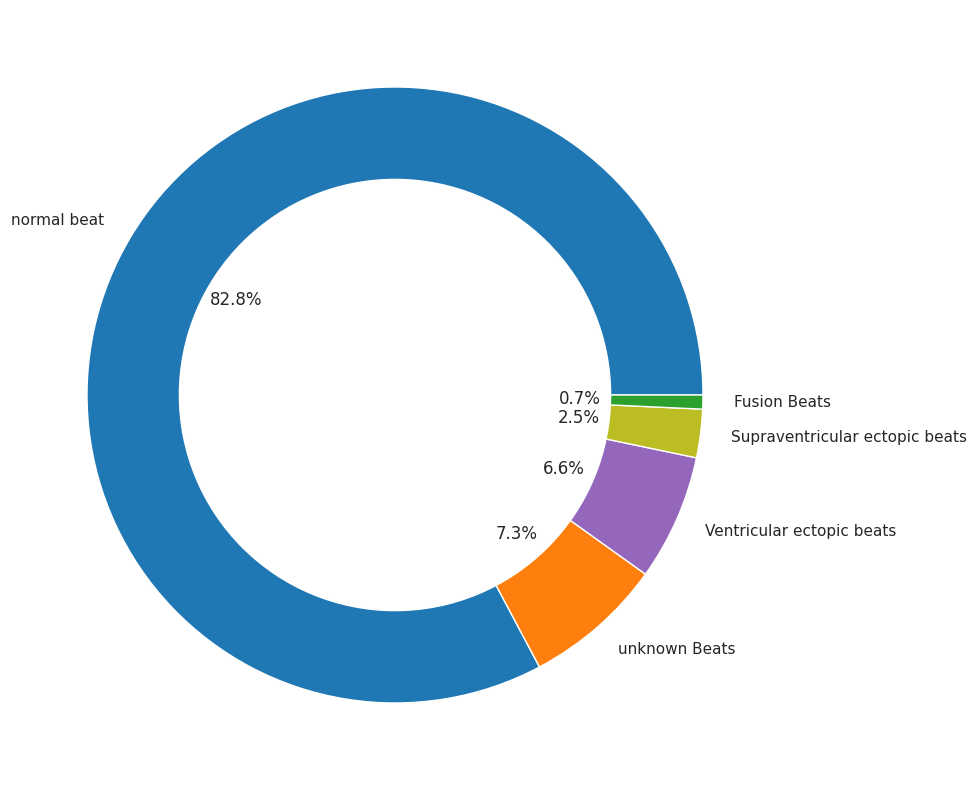

In [ ]:
# representation of classes % wise
per_class = train_df[187].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

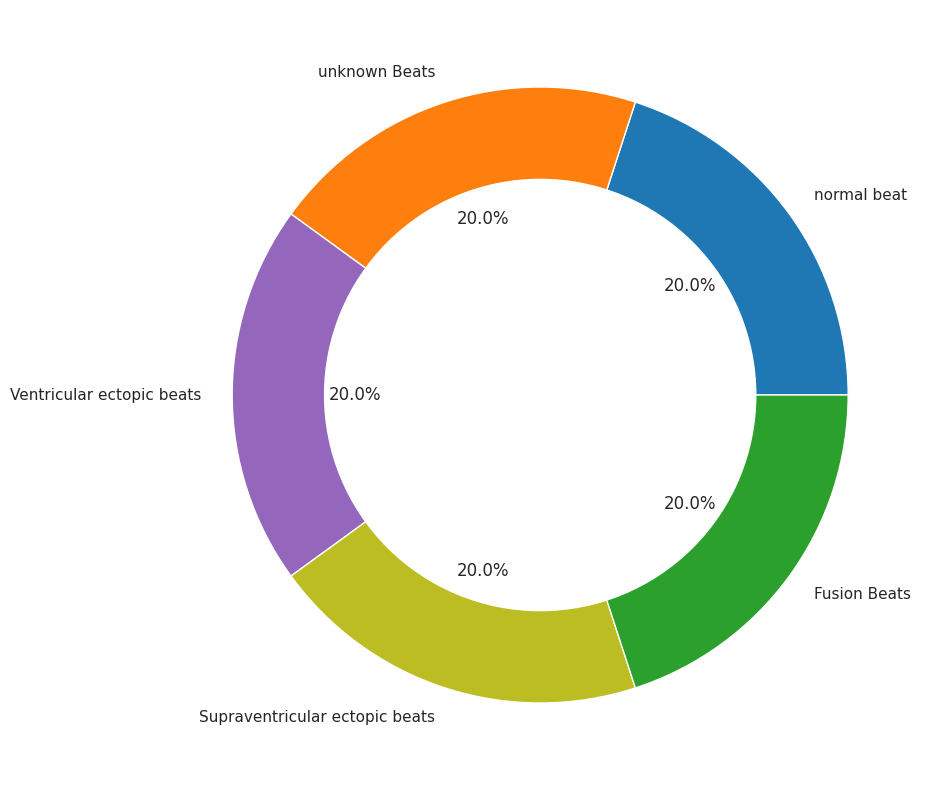

In [ ]:
# representation of classes % wise
per_class = train_df[187].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)

In [ ]:
# randomly sampling from each class
classes=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [ ]:
# peek on classes
classes

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
44643,1.000000,0.934524,0.769841,0.597222,0.404762,0.281746,0.271825,0.244048,0.238095,0.218254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72590,0.924925,0.822823,0.231231,0.000000,0.117117,0.207207,0.219219,0.228228,0.228228,0.270270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
78122,0.000000,0.041391,0.165563,0.240066,0.337748,0.384106,0.450331,0.483444,0.524834,0.589404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
81099,1.000000,0.793741,0.520626,0.220484,0.073969,0.092461,0.075391,0.058321,0.048364,0.034139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
84148,0.905263,0.470175,0.487719,0.515789,0.515789,0.498246,0.505263,0.459649,0.417544,0.298246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


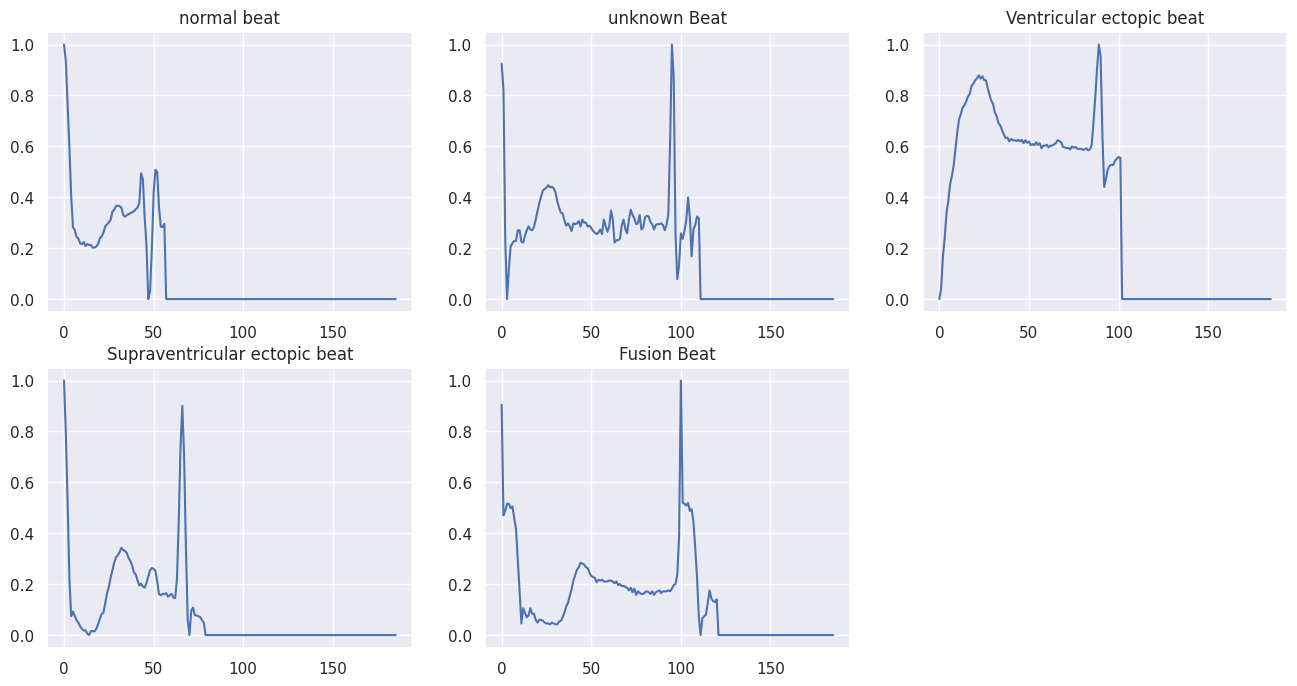

In [ ]:
# plotting classes ECG
plt.figure(figsize=(16,8))
# normal
plt.subplot(2, 3, 1)
plt.plot(classes.iloc[0,:186])
plt.title('normal beat')
# unknown
plt.subplot(2, 3, 2)
plt.plot(classes.iloc[1,:186])
plt.title('unknown Beat')
# veb
plt.subplot(2, 3, 3)
plt.plot(classes.iloc[2,:186])
plt.title('Ventricular ectopic beat')
# seb
plt.subplot(2, 3, 4)
plt.plot(classes.iloc[3,:186])
plt.title('Supraventricular ectopic beat')
# fusion
plt.subplot(2, 3, 5)
plt.plot(classes.iloc[4,:186])
plt.title('Fusion Beat')
# show plot
plt.show()

In [ ]:
def plot_hist(class_number,size,min_):
    # get the class data
    img=train_df.loc[train_df[187]==class_number].values
    # crop it
    img=img[:,min_:size]
    # creates a continous steam of data
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(80,80),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


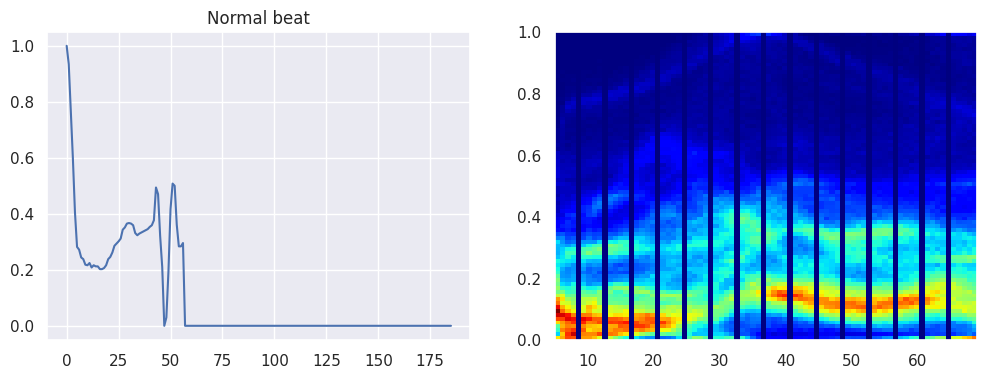

In [ ]:
# Normal Beat
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(classes.iloc[0,:186])
plt.title('Normal beat')
plt.subplot(1, 2, 2)
plot_hist(0,70,5)

900000
900000


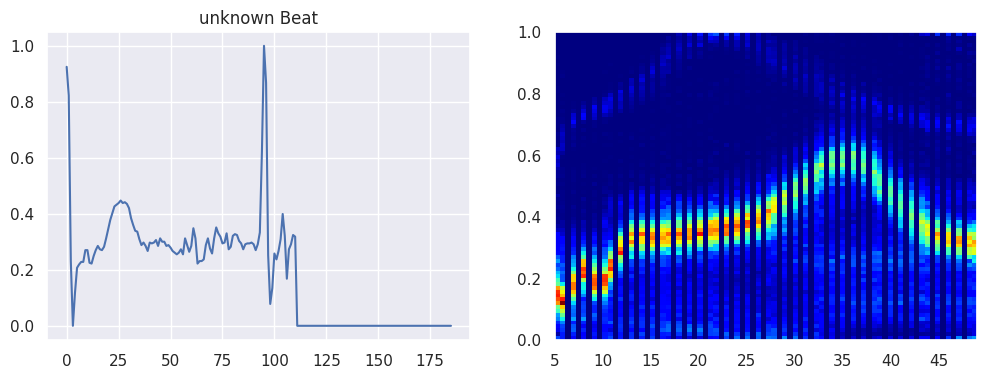

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(classes.iloc[1,:186])
plt.title('unknown Beat')
plt.subplot(1, 2, 2)
plot_hist(1,50,5)

600000
600000


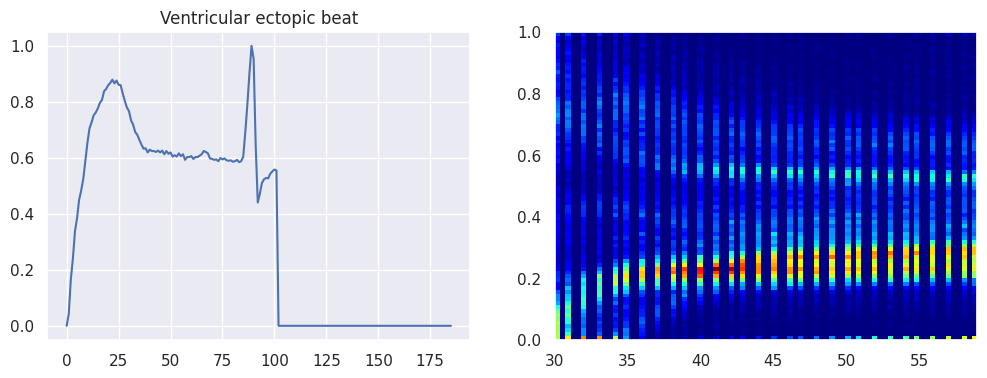

In [ ]:
# veb
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(classes.iloc[2,:186])
plt.title('Ventricular ectopic beat')
plt.subplot(1, 2, 2)
plot_hist(2,60,30)

700000
700000


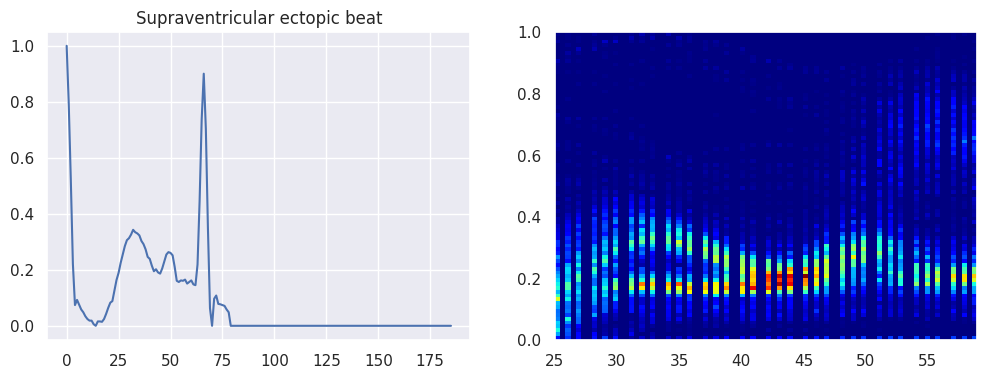

In [ ]:
# seb
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(classes.iloc[3,:186])
plt.title('Supraventricular ectopic beat')
plt.subplot(1, 2, 2)
plot_hist(3,60,25)

640000
640000


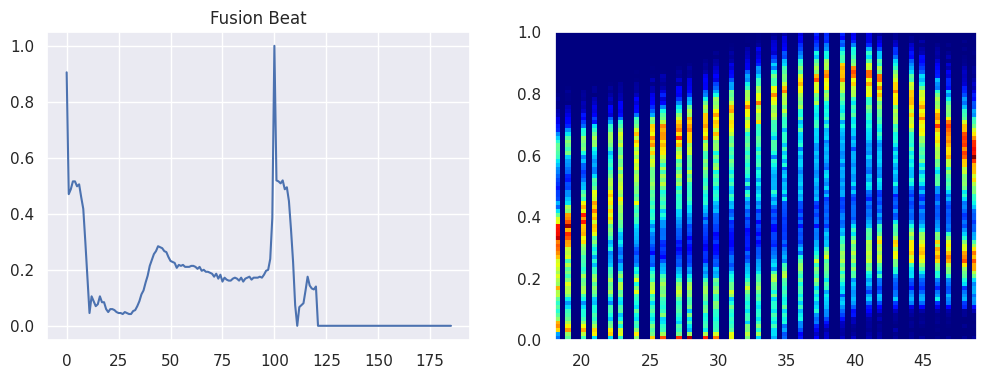

In [ ]:
# fusion
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(classes.iloc[4,:186])
plt.title('Fusion Beat')
plt.subplot(1, 2, 2)
plot_hist(4,50,18)


In [ ]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

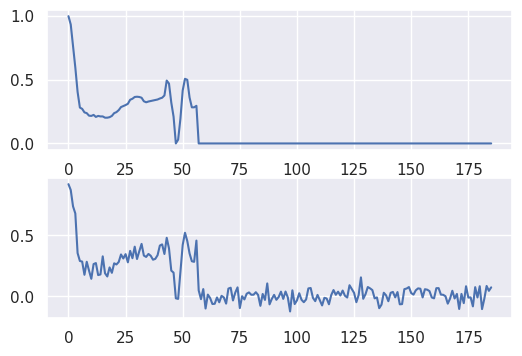

In [ ]:
tempo=classes.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(classes.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [ ]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
#for i in range(len(X_train)):
#    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
from tensorflow.keras.layers import Input, Convolution1D, BatchNormalization, MaxPool1D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

def network(X_train, y_train, X_test, y_test):
    # Ensure inputs are reshaped properly
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    im_shape = (X_train.shape[1], 1)

    inputs_cnn = Input(shape=im_shape, name='inputs_cnn')
    conv1_1 = Convolution1D(64, 6, activation='relu')(inputs_cnn)
    conv1_1 = BatchNormalization()(conv1_1)
    pool1 = MaxPool1D(pool_size=3, strides=2, padding="same")(conv1_1)

    conv2_1 = Convolution1D(64, 3, activation='relu')(pool1)
    conv2_1 = BatchNormalization()(conv2_1)
    pool2 = MaxPool1D(pool_size=2, strides=2, padding="same")(conv2_1)

    conv3_1 = Convolution1D(64, 3, activation='relu')(pool2)
    conv3_1 = BatchNormalization()(conv3_1)
    pool3 = MaxPool1D(pool_size=2, strides=2, padding="same")(conv3_1)

    flatten = Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)

    # Define model
    model = Model(inputs=inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=8),
        ModelCheckpoint(filepath='best_model.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)
    ]

    # Train the model with 5 epochs
    history = model.fit(X_train, y_train, epochs=5, callbacks=callbacks, batch_size=32, validation_data=(X_test, y_test))

    # Load the best weights
    model.load_weights('best_model.weights.h5')

    return model, history


In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']

    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
from tensorflow.keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras as keras


In [ ]:
model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 102s 32ms/step - accuracy: 0.8861 - loss: 0.3096 - val_accuracy: 0.9048 - val_loss: 0.2728
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 141s 31ms/step - accuracy: 0.9716 - loss: 0.0807 - val_accuracy: 0.9512 - val_loss: 0.1471
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 144s 32ms/step - accuracy: 0.9837 - loss: 0.0487 - val_accuracy: 0.9634 - val_loss: 0.1375
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 137s 31ms/step - accuracy: 0.9873 - loss: 0.0389 - val_accuracy: 0.9720 - val_loss: 0.1144
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 99s 32ms/step - accuracy: 0.9897 - loss: 0.0300 - val_accuracy: 0.9698 - val_loss: 0.1280


Accuracy: 97.20%


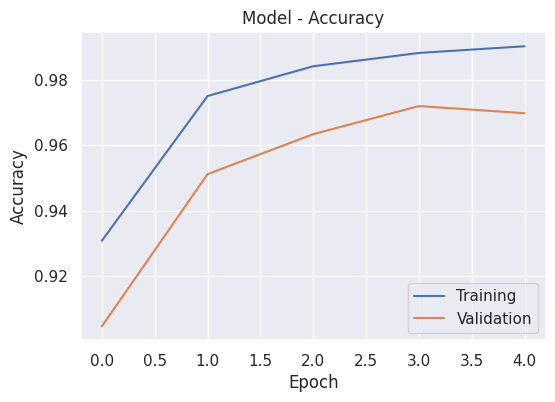

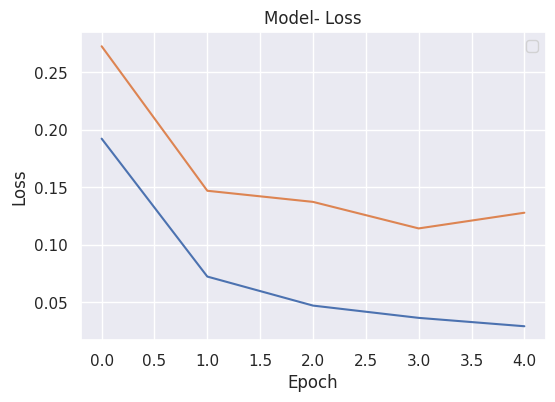

685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step


In [ ]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
Normalized confusion matrix


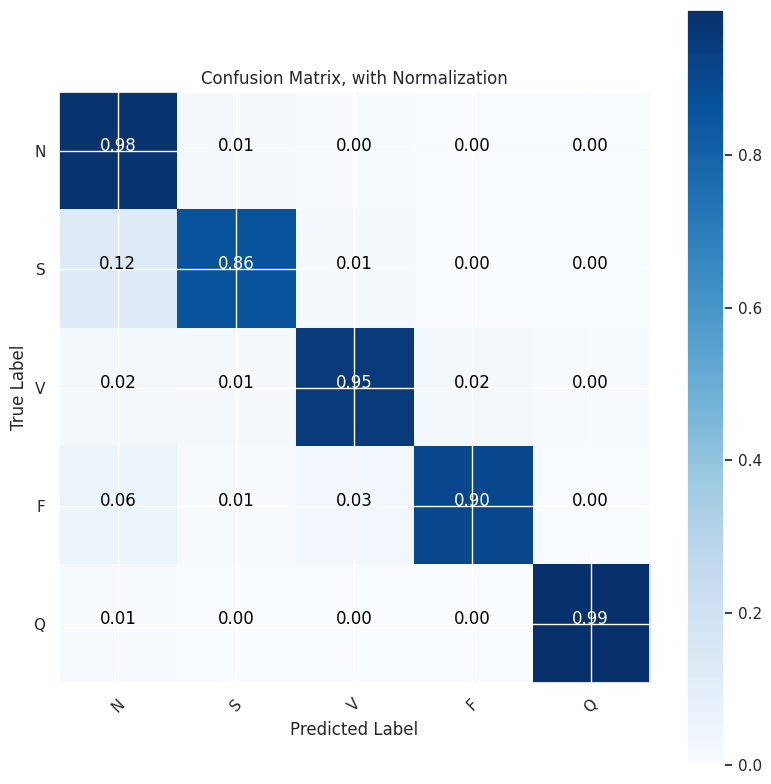

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# Example Usage
# Compute confusion matrix
y_pred = model.predict(X_test)  # Ensure y_pred is the predicted labels from the model
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'], normalize=True,
                      title='Confusion Matrix, with Normalization')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
encoder = preprocessing.LabelEncoder()
encoder.fit(target_train)
Y_train = encoder.transform(target_train)
encoder.fit(target_test)
Y_test = encoder.transform(target_test)

In [ ]:
nsamples, nx, ny = X_train.shape
train_dataset = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
test_dataset = X_test.reshape((nsamples,nx*ny))

In [ ]:
accu = []
prec = []
recc = []
f1   = []
models =[]

In [ ]:
ytest = Y_test

# Decision Tree

In [ ]:
dtree_model = DecisionTreeClassifier(max_depth = 100).fit(train_dataset, Y_train)
dt_pred = dtree_model.predict(test_dataset)

accuracy_score(Y_test, dt_pred)#, normalize=False)

0.9277361593276082

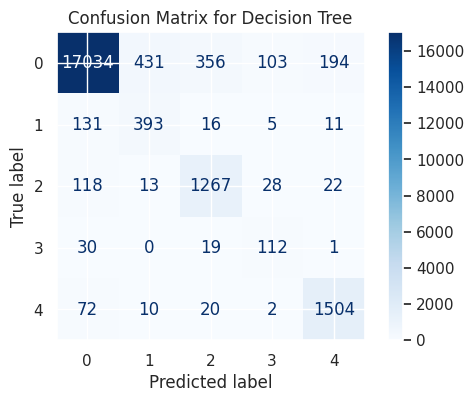

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(Y_test, dt_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Decision Tree")
plt.show()


In [ ]:
print('Accuracy Score : ' + str(accuracy_score(ytest, dt_pred)))
print('Precision Score : ' + str(precision_score(ytest,dt_pred,average='macro')))
print('Recall Score : ' + str(recall_score(ytest,dt_pred,average='macro')))
print('F1 Score : ' + str(f1_score(ytest,dt_pred,average='macro')))

# Classifier Confusion matrix

#print('Confusion Matrix : \n' + str(confusion_matrix(ytest,dt_pred)))


accu.append(accuracy_score(ytest, dt_pred))
prec.append(precision_score(ytest,dt_pred,average='macro'))
recc.append(recall_score(ytest,dt_pred,average='macro'))
f1.append(f1_score(ytest,dt_pred,average='macro'))
models.append("Decision Tree" )

Accuracy Score : 0.9277361593276082
Precision Score : 0.7030453134915626
Recall Score : 0.8297371873676823
F1 Score : 0.7549435374720105


# Gaussian naive_bayes

In [ ]:
gnb = GaussianNB()
nb_pred = gnb.fit(train_dataset, Y_train).predict(test_dataset)


accuracy_score(ytest,nb_pred)

0.18888178329983554

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(ytest, nb_pred)))
print('Precision Score : ' + str(precision_score(ytest,nb_pred,average='macro')))
print('Recall Score : ' + str(recall_score(ytest,nb_pred,average='macro')))
print('F1 Score : ' + str(f1_score(ytest,nb_pred,average='macro')))

#Dummy Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,nb_pred)))

Accuracy Score : 0.18888178329983554
Precision Score : 0.33573706699674966
Recall Score : 0.45874728202303494
F1 Score : 0.177890660826155
Confusion Matrix : 
[[ 2041   108  1165  2497 12307]
 [   37    79    39    55   346]
 [  118     9   289    89   943]
 [    0     0     1   138    23]
 [    1     0     5    14  1588]]


In [ ]:
accu.append(accuracy_score(ytest, nb_pred))
prec.append(precision_score(ytest,nb_pred,average='macro'))
recc.append(recall_score(ytest,nb_pred,average='macro'))
f1.append(f1_score(ytest,nb_pred,average='macro'))
models.append("Gaussian naive_bayes" )

# Random forrest

In [ ]:
RF = RandomForestClassifier().fit(train_dataset, Y_train)
rf_pred = RF.predict(test_dataset)

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(ytest, rf_pred)))
print('Precision Score : ' + str(precision_score(ytest,rf_pred,average='macro')))
print('Recall Score : ' + str(recall_score(ytest,rf_pred,average='macro')))
print('F1 Score : ' + str(f1_score(ytest,rf_pred,average='macro')))

#Dummy Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,rf_pred)))

Accuracy Score : 0.9769322126804312
Precision Score : 0.9116034120558927
Recall Score : 0.8717621064162857
F1 Score : 0.8907001620310337
Confusion Matrix : 
[[17954    84    50    11    19]
 [  141   412     2     0     1]
 [   69     2  1355    16     6]
 [   30     0    14   118     0]
 [   54     0     6     0  1548]]


In [ ]:
accu.append(accuracy_score(ytest, rf_pred))
prec.append(precision_score(ytest,rf_pred,average='macro'))
recc.append(recall_score(ytest,rf_pred,average='macro'))
f1.append(f1_score(ytest,rf_pred,average='macro'))
models.append("Random forrest" )

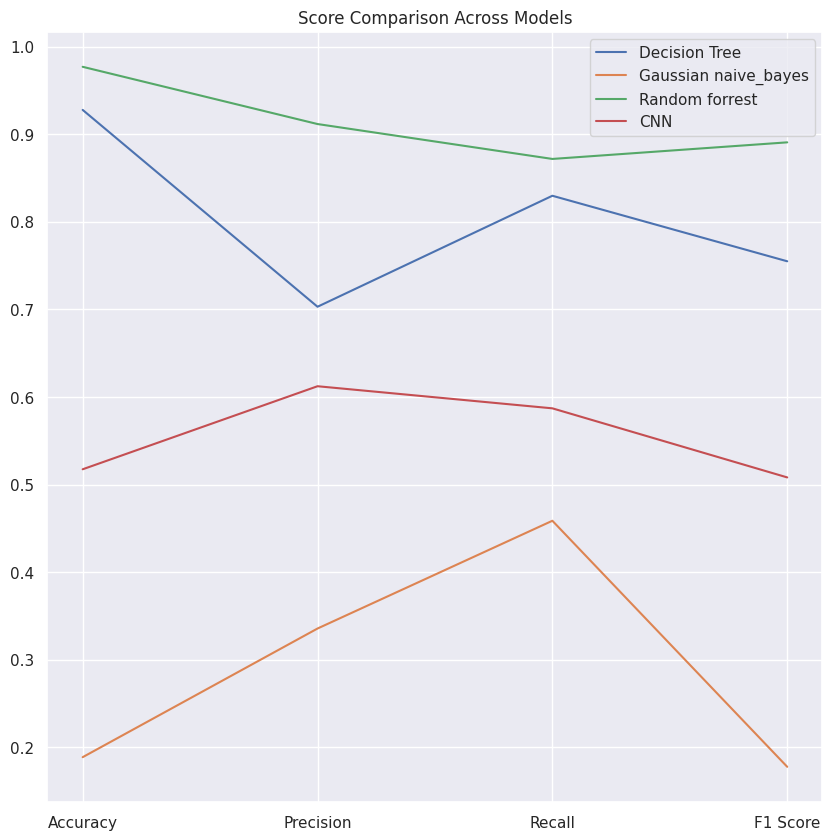

In [ ]:
# Ensure CNN metrics are included in accu, prec, recc, f1, and models
x = ['Accuracy', 'Precision', 'Recall', 'F1 Score']  # Metric names for the x-axis

plt.figure(figsize=(10, 10))
plt.title('Score Comparison Across Models')

# Plot lines for all models, including CNN
for i in range(len(accu)):
    plt.plot(x, [accu[i], prec[i], recc[i], f1[i]], label=models[i])

# Add legend and save the plot
plt.legend()
plt.savefig('curves_with_cnn.png')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate CNN model metrics
cnn_accuracy = accuracy_score(ytrue, ypred)
cnn_precision = precision_score(ytrue, ypred, average='macro')
cnn_recall = recall_score(ytrue, ypred, average='macro')
cnn_f1 = f1_score(ytrue, ypred, average='macro')

# Append CNN metrics to the lists
accu.append(cnn_accuracy)
prec.append(cnn_precision)
recc.append(cnn_recall)
f1.append(cnn_f1)
models.append("CNN")




In [ ]:
scores = pd.DataFrame({'Model':models,'Accuracy':accu,'Precision':prec,'Recall':recc,'f1 score' :f1})


In [ ]:
scores.to_csv('scores.csv')


In [ ]:
scores


,Model,Accuracy,Precision,Recall,f1 score
0,Decision Tree,0.927736,0.703045,0.829737,0.754944
1,Gaussian naive_bayes,0.188882,0.335737,0.458747,0.177891
2,Random forrest,0.976932,0.911603,0.871762,0.890700
3,CNN,0.517508,0.612312,0.587083,0.508229
4,CNN,0.517508,0.612312,0.587083,0.508229
